In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
def timeStepsList():
	timeStepsList = np.loadtxt("timeStepsList.txt", dtype=str)
	index = np.argsort(timeStepsList.astype(np.float))
	timeStepsList = timeStepsList[index]
	return timeStepsList[1:-2]

In [4]:
def readTensor(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'3', fileName[0]+'4', fileName[0]+'5', fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr

In [5]:
def readVector(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr

In [6]:
def readScalar(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.columns = [fileName[0]]
	arr.loc[:] = arr.loc[:].astype(float)
	return arr

In [7]:
def formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size):
	data = pd.DataFrame()
	for time in TSL:
		kwargs = {'folder':folder, 'time':time, 'sz':size}
		scalars = FsScalars.apply(readScalar, axis=1, **kwargs)
		vectors = FsVectors.apply(readVector, axis=1, **kwargs)
		tensors = FsTensors.apply(readTensor, axis=1, **kwargs)
		tmp = pd.concat(list(scalars[:])+list(vectors[:])+list(tensors[:]), axis=1)
		data = data.append(tmp, ignore_index=True)
	return data

Index(['alpha.water', 'res/alpha.water', 'res/p', 'res/I0', 'res/I1', 'res/I2',
       'res/I3', 'res/I4', 'U0', 'U1',
       ...
       'res/T83', 'res/T84', 'res/T85', 'res/T86', 'res/T87', 'res/T88', 'dU0',
       'dU1', 'dU2', 'dAW'],
      dtype='object', length=102)


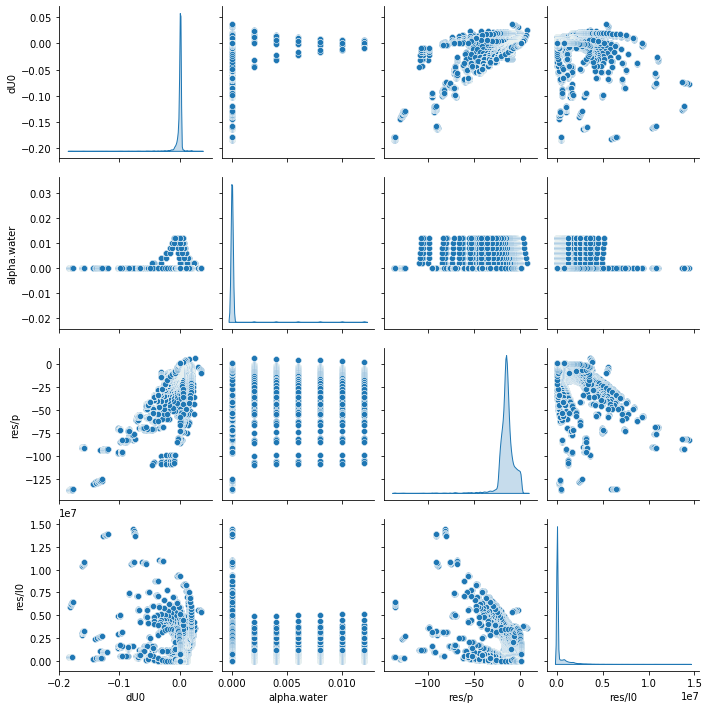

In [8]:
TSL = timeStepsList()
folder = 'TIF'
deltaT = 1e-06
FsScalars = pd.DataFrame([['alpha.water'], ['res/alpha.water'], ['res/p'], ['res/I0'], ['res/I1'], ['res/I2'], ['res/I3'], ['res/I4']])
FsVectors = pd.DataFrame([['U'], ['res/U'], ['res/Uref']])
FsTensors = pd.DataFrame([['res/T0'], ['res/T1'], ['res/T2'], ['res/T3'], ['res/T4'], ['res/T5'], ['res/T6'], ['res/T7'], ['res/T8']])
size = 27500
lenTSL = len(TSL)
trainTSL = TSL[:int(lenTSL/3)]
testTSL = TSL[int(lenTSL/3):]
trainData = formDataset(trainTSL, folder, FsScalars, FsVectors, FsTensors, size)
trainData['dU0'] = trainData['res/U0'] - trainData['U0']
trainData['dU1'] = trainData['res/U1'] - trainData['U1']
trainData['dU2'] = trainData['res/U2'] - trainData['U2']
trainData['dAW'] = trainData['res/alpha.water'] - trainData['alpha.water']
print(trainData.columns)
sns.pairplot(trainData[['dU0', 'alpha.water', 'res/p', 'res/I0']], diag_kind='kde')
#testData = formDataset(testTSL, folder, FsScalars, FsVectors, FsTensors, size)

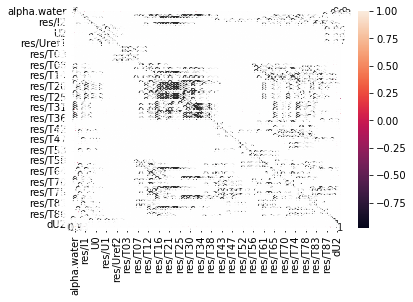

In [9]:
sns.heatmap(trainData.corr(), annot = True)